In [ ]:
import sys
sys.path.append("../")

In [49]:
import matplotlib.pyplot as plt
import numpy as np

from matplotlib.ticker import FormatStrFormatter
from utilities.result_utilities import get_filepath, extract_figures, extract_stats, extract_lr

In [50]:
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["cm"],
})

In [51]:
dura = 'longest'
files = get_filepath(dura)
print(files)


['./longest/coxph-longest/training_log_McoxphCcentralSNoneC1L1.txt', './longest/coxph-longest/training_log_McoxphCiidSNoneC4L1.txt', './longest/coxph-longest/training_log_McoxphCiidSNoneC4L5.txt', './longest/coxph-longest/training_log_McoxphCiidSNoneC4L20.txt', './longest/coxph-longest/training_log_McoxphCiidSNoneC4L100.txt', './longest/coxph-longest/training_log_McoxphCnoniidS0C4L1.txt', './longest/coxph-longest/training_log_McoxphCnoniidS0C4L5.txt', './longest/coxph-longest/training_log_McoxphCnoniidS0C4L20.txt', './longest/coxph-longest/training_log_McoxphCnoniidS0C4L100.txt', './longest/nnph-longest/training_log_MNNphCcentralSNoneC1L1.txt', './longest/nnph-longest/training_log_MNNphCiidSNoneC4L1.txt', './longest/nnph-longest/training_log_MNNphCiidSNoneC4L5.txt', './longest/nnph-longest/training_log_MNNphCiidSNoneC4L20.txt', './longest/nnph-longest/training_log_MNNphCiidSNoneC4L100.txt', './longest/nnph-longest/training_log_MNNphCnoniidS0C4L1.txt', './longest/nnph-longest/training_l

In [52]:
lrs = extract_lr(files)
for i, l in enumerate(lrs):
    if i % 9 in [0,1,5]:
        print(i, l)

0 0.01
1 0.01
5 0.01
9 0.01
10 0.01
14 0.01
18 0.01
19 0.01
23 0.1


In [53]:
concordances, briers = extract_figures(files)
# for file in files:
#     with open(file, 'r') as f:
#         # print(file)
#         lines = f.read().splitlines()
#         last_line = lines[-1]
#         # print(last_line)
#         start = last_line.find('concordance: ') + len('concordance: ') 
#         end = 10        
#         concordance = float(last_line[start:start+end])
#         concordances.append(concordance)
#         # print(round(concordance * 100, 2))
#         start = last_line.find('Brier: ') + len('Brier: ') 
#         end = 10     
#         brier = float(last_line[start:start+end])
#         briers.append(brier)
#         # print(round(brier * 100, 2))


In [54]:
indiv_rounds, avg_rounds, std_rounds, indiv_concordances, avg_concordances, std_concordances, indiv_briers, avg_briers, std_briers = extract_stats(files)
dec = 2
# for i in range(len(avg_concordances)):
    # print(concs)
    # print(f'{round(100*avg_concordances[i],dec):.2f} +- {round(100*std_concordances[i],dec):.2f}' )
    # print(brs)
    # print(f'{round(100*avg_briers[i],dec):.2f} +- {round(100*std_briers[i],dec):.2f}' )        
    # print(';')  

In [55]:
indiv_concordances

[[0.74791521, 0.7421371, 0.73928984, 0.74258989, 0.74511639],
 [0.74528403, 0.74082428, 0.74525331, 0.74326896, 0.75025651],
 [0.74706444, 0.74438305, 0.73532064, 0.74494333, 0.74851981],
 [0.75044893, 0.74513203, 0.7460451, 0.73902875, 0.74150241],
 [0.74220439, 0.74353403, 0.74597326, 0.74636599, 0.73882878],
 [0.73376133, 0.72764949, 0.74096059, 0.72641655, 0.73007684],
 [0.73141235, 0.73496779, 0.72387316, 0.73114074, 0.73283105],
 [0.74196167, 0.73495756, 0.73659917, 0.73186923, 0.73548346],
 [0.72376703, 0.73931442, 0.72493269, 0.71627344, 0.73963239],
 [0.74905147, 0.74628591, 0.74109402, 0.74471498, 0.74751633],
 [0.74620023, 0.74380343, 0.74835595, 0.74010268, 0.7544996],
 [0.75052138, 0.74620688, 0.73785421, 0.74495006, 0.74804664],
 [0.7506102, 0.74462048, 0.74700994, 0.74065891, 0.74235377],
 [0.73457664, 0.70813336, 0.74232751, 0.73855008, 0.73826247],
 [0.73641387, 0.72474646, 0.73823909, 0.72948488, 0.73417473],
 [0.72584353, 0.6641009, 0.73375839, 0.73725157, 0.73142145

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


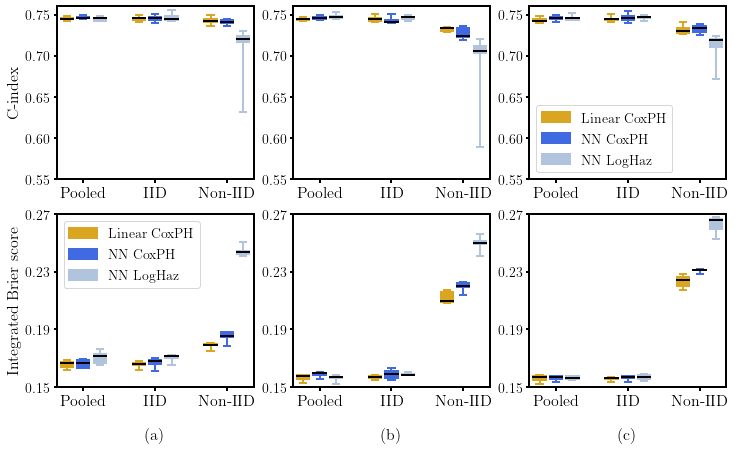

In [56]:
fig = plt.figure(1, figsize=(12, 7))

duras = ['shorter', 'short','longest','shorter', 'short','longest']
lab = ['(a)','(b)','(c)']
for idx in range(6):

    dura = duras[idx]
    files = get_filepath(dura)
    indiv_rounds, avg_rounds, std_rounds, indiv_concordances, avg_concordances, std_concordances, indiv_briers, avg_briers, std_briers = extract_stats(files)

    if idx < 3:
        nums = indiv_concordances
    else:
        nums = indiv_briers

    # Create an axes instance
    ax = fig.add_subplot(2,3,1+idx)
    for axis in ['top','bottom','left','right']:
        ax.spines[axis].set_linewidth(2)
    # Create the boxplot
    # base= 1 
    adj = 9
    colors = ['goldenrod','royalblue','lightsteelblue']
    bps = []
    for i,base in enumerate([0,1,5]):
        gap = 3.5
        base_pos = [1.2, 2, 2.8]
        positions = [base_pos[0] + gap*i, base_pos[1] + gap*i, base_pos[2] + gap*i]
        bp = ax.boxplot([nums[i] for i in [base,base+adj,base+2*adj]], whis=999, patch_artist=True, positions = positions, widths = 0.6)
        bps.append(bp)
        for j, box in enumerate(bp['boxes']):
            # change outline color
            box.set( color=colors[j], linewidth=2)
            # change fill color
            box.set( facecolor = colors[j] )

        for j, whisker in enumerate(bp['whiskers']):
            whisker.set(color=colors[j//2], linewidth=2)
        for j,cap in enumerate(bp['caps']):
            cap.set(color=colors[j//2], linewidth=2)

        for median in bp['medians']:
            median.set(color='black', linewidth=2)

        for flier in bp['fliers']:
            flier.set(marker='D', color='black', alpha=0.5)
    if idx < 3:
        plt.xticks([base_pos[1], base_pos[1]+gap, base_pos[1]+2*gap],['Pooled', 'IID','Non-IID'])
    else:
        plt.xticks([base_pos[1], base_pos[1]+gap, base_pos[1]+2*gap],['Pooled', f'IID \n \n {lab[idx-3]}','Non-IID'])
    plt.tick_params(axis='x',labelsize=16, width=2)
    plt.tick_params(axis='y',labelsize=14,width=2)
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    # ax.set_xticklabels(['A', 'B', 'C'])
    # ax.set_xticks([2, 2+4, 2+2*4])
    if idx < 3:
        x1,x2,y1,y2 = ax.axis()  
        ax.axis((x1,x2,0.55,0.76))
    else:
        x1,x2,y1,y2 = ax.axis()  
        ax.axis((x1,x2,0.15,0.27))    
        ax.set_yticks(np.arange(0.15,0.27,0.04))
    
    if idx == 0:
        plt.ylabel(ylabel='C-index', fontsize=16)
    if idx == 2:
        ax.legend([bps[0]["boxes"][0], bps[0]["boxes"][1], bps[0]["boxes"][2]],['Linear CoxPH', 'NN CoxPH', 'NN LogHaz'], loc='lower left',fontsize=14)
    if idx == 3:
        ax.legend([bps[0]["boxes"][0], bps[0]["boxes"][1], bps[0]["boxes"][2]],['Linear CoxPH', 'NN CoxPH', 'NN LogHaz'], loc='upper left',fontsize=14)
        plt.ylabel(ylabel='Integrated Brier score', fontsize=16)
fig.savefig('../figs/duration_flex.eps', bbox_inches='tight')



In [ ]:
fig = plt.figure(1, figsize=(12, 7))

duras = ['shorter', 'short','longest','shorter', 'short','longest']
lab = ['(a)','(b)','(c)']
for idx in range(6):

    dura = duras[idx]
    files = get_filepath(dura)
    indiv_rounds, avg_rounds, std_rounds, indiv_concordances, avg_concordances, std_concordances, indiv_briers, avg_briers, std_briers = extract_stats(files)

    if idx < 3:
        nums = indiv_concordances
    else:
        nums = indiv_briers

    # Create an axes instance
    ax = fig.add_subplot(2,3,1+idx)
    for axis in ['top','bottom','left','right']:
        ax.spines[axis].set_linewidth(2)
    # Create the boxplot
    # base= 1 
    adj = 9
    colors = ['goldenrod','royalblue','lightsteelblue']
    bps = []
    for i,base in enumerate([0,1,5]):
        gap = 3.5
        base_pos = [1.2, 2, 2.8]
        positions = [base_pos[0] + gap*i, base_pos[1] + gap*i, base_pos[2] + gap*i]
        bp = ax.boxplot([nums[i] for i in [base,base+adj,base+2*adj]], whis=999, patch_artist=True, positions = positions, widths = 0.6)
        bps.append(bp)
        for j, box in enumerate(bp['boxes']):
            # change outline color
            box.set( color=colors[j], linewidth=2)
            # change fill color
            box.set( facecolor = colors[j] )

        for j, whisker in enumerate(bp['whiskers']):
            whisker.set(color=colors[j//2], linewidth=2)
        for j,cap in enumerate(bp['caps']):
            cap.set(color=colors[j//2], linewidth=2)

        for median in bp['medians']:
            median.set(color='black', linewidth=2)

        for flier in bp['fliers']:
            flier.set(marker='D', color='black', alpha=0.5)
    if idx < 3:
        plt.xticks([base_pos[1], base_pos[1]+gap, base_pos[1]+2*gap],['Pooled', 'IID','Non-IID'])
    else:
        plt.xticks([base_pos[1], base_pos[1]+gap, base_pos[1]+2*gap],['Pooled', f'IID \n \n {lab[idx-3]}','Non-IID'])
    plt.tick_params(axis='x',labelsize=16, width=2)
    plt.tick_params(axis='y',labelsize=14,width=2)
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    # ax.set_xticklabels(['A', 'B', 'C'])
    # ax.set_xticks([2, 2+4, 2+2*4])
    if idx < 3:
        x1,x2,y1,y2 = ax.axis()  
        ax.axis((x1,x2,0.55,0.76))
    else:
        x1,x2,y1,y2 = ax.axis()  
        ax.axis((x1,x2,0.15,0.27))    
        ax.set_yticks(np.arange(0.15,0.27,0.04))
    
    if idx == 0:
        plt.ylabel(ylabel='C-index', fontsize=16)
    if idx == 2:
        ax.legend([bps[0]["boxes"][0], bps[0]["boxes"][1], bps[0]["boxes"][2]],['Linear PH', 'NN PH', 'NN nonPH'], loc='lower left',fontsize=14)
    if idx == 3:
        ax.legend([bps[0]["boxes"][0], bps[0]["boxes"][1], bps[0]["boxes"][2]],['Linear PH', 'NN PH', 'NN nonPH'], loc='upper left',fontsize=14)
        plt.ylabel(ylabel='Integrated Brier score', fontsize=16)
fig.savefig('../figs/duration_flex.eps', bbox_inches='tight')

